## 2024 CSU Systemwide Business Analytics Competition

## Predictive Modeling for Loan Approval Decisions Using SBA National Data

### Import Libraries

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import re

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing and Splitting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
)

# Ignore Warnings (Optional)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)


## Load the Dataset

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/Users/sindhujaarivukkarasu/Documents/ML Comp/SBAnational.csv'
data = pd.read_csv(file_path)


## Data Exploration and Preprocessing

In [6]:
# Inspect the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOff

In [9]:
print("\nSummary of the dataset:")
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 

In [11]:
print("\nBasic statistics of numeric columns:")
print(data.describe())


Basic statistics of numeric columns:
       LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312759      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.00000

In [13]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64


In [21]:
# Check for duplicate rows
print("\nNumber of duplicate rows in the dataset:")
print(data.duplicated().sum())


Number of duplicate rows in the dataset:
0


In [22]:
# Analyze column names
print("\nColumn names in the dataset:")
print(data.columns)



Column names in the dataset:
Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')


In [23]:
# Calculate the percentage of missing values in the target variable 'MIS_Status'
missing_count = data['MIS_Status'].isnull().sum()
total_rows = data.shape[0]
missing_percentage = (missing_count / total_rows) * 100

print(f"Percentage of missing values in MIS_Status: {missing_percentage:.2f}%")


Percentage of missing values in MIS_Status: 0.22%


In [29]:
# Validate missing count and total rows
missing_count = data['MIS_Status'].isnull().sum()
total_rows = data.shape[0]

# Calculate missing percentage
missing_percentage = (missing_count / total_rows) * 100

# Output details
print(f"Missing count in MIS_Status: {missing_count}")
print(f"Total rows in the dataset: {total_rows}")
print(f"Percentage of missing values in MIS_Status: {missing_percentage:.2f}%")


Missing count in MIS_Status: 1997
Total rows in the dataset: 899164
Percentage of missing values in MIS_Status: 0.22%


In [31]:
# Drop rows with missing MIS_Status
data = data.dropna(subset=['MIS_Status'])

# Confirm the number of rows remaining in the dataset
print(f"Number of rows after dropping missing MIS_Status: {data.shape[0]}")


Number of rows after dropping missing MIS_Status: 897167


In [33]:
# Encode MIS_Status as binary
data['MIS_Status_Binary'] = data['MIS_Status'].apply(lambda x: 1 if x == 'CHGOFF' else 0)


## MIS_Status distribution

Class distribution of MIS_Status:
MIS_Status
P I F     82.438275
CHGOFF    17.561725
Name: proportion, dtype: float64


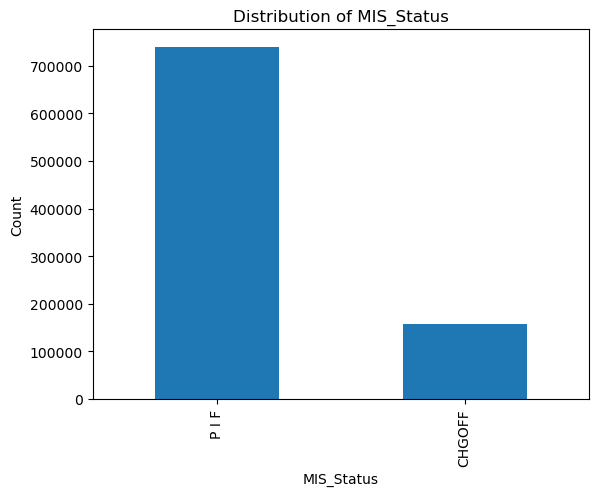

In [36]:
# Value counts and percentages
print("Class distribution of MIS_Status:")
print(data['MIS_Status'].value_counts(normalize=True) * 100)

# Bar chart visualization
import matplotlib.pyplot as plt
data['MIS_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of MIS_Status')
plt.xlabel('MIS_Status')
plt.ylabel('Count')
plt.show()


### Convert Monetary Columns ($-Sign Issue)

Columns: DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv.

In [39]:
# List of monetary columns
monetary_columns = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Remove '$' and ',' and convert to float
for col in monetary_columns:
    data[col] = pd.to_numeric(data[col].str.replace(r'[\$,]', '', regex=True), errors='coerce')


### Handle Alphanumeric Categorical Columns
Columns: RevLineCr, LowDoc.

In [42]:
print("RevLineCr unique values:", data['RevLineCr'].unique())
print("LowDoc unique values:", data['LowDoc'].unique())

print("Missing values in RevLineCr:", data['RevLineCr'].isnull().sum())
print("Missing values in LowDoc:", data['LowDoc'].isnull().sum())


RevLineCr unique values: ['N' '0' 'Y' 'T' nan '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-'
 'Q']
LowDoc unique values: ['Y' 'N' 'C' '1' nan 'S' 'R' 'A' '0']
Missing values in RevLineCr: 4520
Missing values in LowDoc: 2578


In [44]:
print(data.groupby('MIS_Status')['RevLineCr'].value_counts(normalize=True))
print(data.groupby('MIS_Status')['LowDoc'].value_counts(normalize=True))


MIS_Status  RevLineCr
CHGOFF      N            0.389979
            Y            0.323855
            0            0.244476
            T            0.041671
            1            0.000013
            R            0.000006
P I F       N            0.486740
            0            0.297795
            Y            0.203577
            T            0.011804
            1            0.000029
            R            0.000018
            `            0.000015
            2            0.000008
            C            0.000003
            ,            0.000001
            -            0.000001
            .            0.000001
            3            0.000001
            4            0.000001
            5            0.000001
            7            0.000001
            A            0.000001
            Q            0.000001
Name: proportion, dtype: float64
MIS_Status  LowDoc
CHGOFF      N         0.933042
            Y         0.063260
            S         0.001725
            A    

In [46]:
# Define valid categories for each column
valid_revlinecr = ['N', 'Y', '0']
valid_lowdoc = ['N', 'Y']

# Simplify RevLineCr
data['RevLineCr'] = data['RevLineCr'].apply(lambda x: x if x in valid_revlinecr else 'Other')
# Simplify LowDoc
data['LowDoc'] = data['LowDoc'].apply(lambda x: x if x in valid_lowdoc else 'Other')


### Group NewExist Column
Column: NewExist (1 = Existing Business, 2 = New Business).

In [49]:
# Check value counts, including NaN
print(data['NewExist'].value_counts(dropna=False))


NewExist
1.0    643446
2.0    252559
0.0      1028
NaN       134
Name: count, dtype: int64


In [51]:
# Replace 0.0 and NaN with "Unknown" (represented as 3)
data['NewExist'] = data['NewExist'].replace(0.0, 3).fillna(3).astype(int)


In [53]:
# Check value counts, including NaN
print(data['NewExist'].value_counts(dropna=False))


NewExist
1    643446
2    252559
3      1162
Name: count, dtype: int64


In [55]:
# Analyze relationship between NewExist and MIS_Status
print(data.groupby('MIS_Status')['NewExist'].value_counts(normalize=True))


MIS_Status  NewExist
CHGOFF      1           0.698879
            2           0.300632
            3           0.000489
P I F       1           0.721100
            2           0.277433
            3           0.001467
Name: proportion, dtype: float64


In [57]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      897167 non-null  int64  
 1   Name               897153 non-null  object 
 2   City               897137 non-null  object 
 3   State              897154 non-null  object 
 4   Zip                897167 non-null  int64  
 5   Bank               895661 non-null  object 
 6   BankState          895654 non-null  object 
 7   NAICS              897167 non-null  int64  
 8   ApprovalDate       897167 non-null  object 
 9   ApprovalFY         897167 non-null  object 
 10  Term               897167 non-null  int64  
 11  NoEmp              897167 non-null  int64  
 12  NewExist           897167 non-null  int64  
 13  CreateJob          897167 non-null  int64  
 14  RetainedJob        897167 non-null  int64  
 15  FranchiseCode      897167 non-null  int64  
 16  UrbanRu

In [381]:
print("\nBasic statistics of numeric columns:")
print(data.describe())


Basic statistics of numeric columns:
       LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.971670e+05  897167.000000  897167.000000  897167.000000   
mean    4.774982e+09   53856.710734  398541.853498     110.848592   
std     2.537370e+09   31170.471151  263359.727579      78.900862   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.593070e+09   27612.000000  235210.000000      60.000000   
50%     4.363894e+09   55416.000000  445310.000000      84.000000   
75%     6.908644e+09   83706.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  897167.000000  897167.000000  897167.000000  897167.000000   
mean       11.412562       1.284098       8.444305      10.807308   
std        73.793775       0.453847     236.950249     237.382398   
min         0.000000       1.000000       0.000000       0.00000

## Univariate Analysis - Numeric Features

Analyze the distribution and identify skewness or outliers for numeric features.

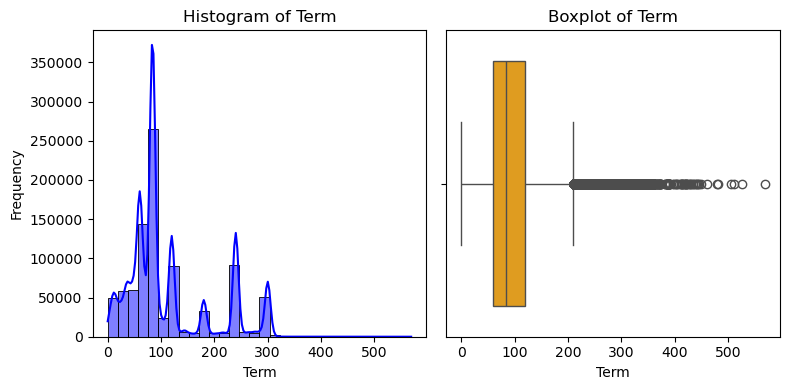

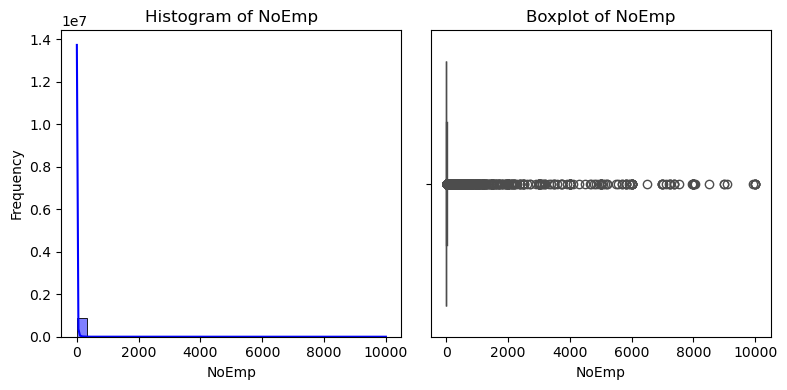

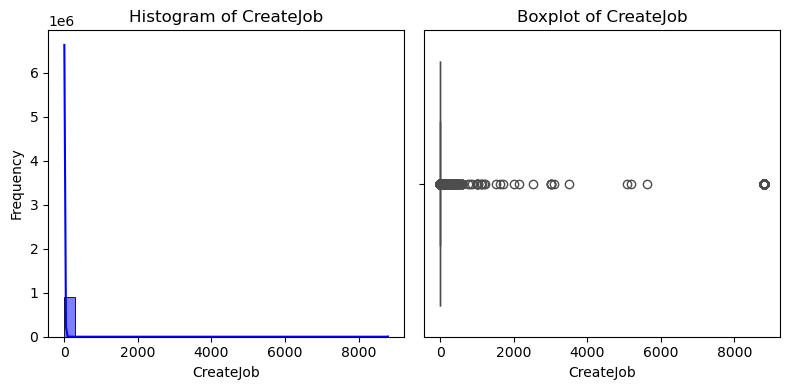

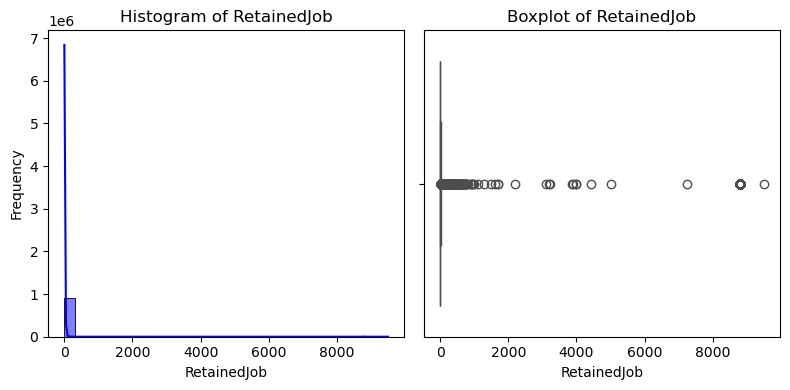

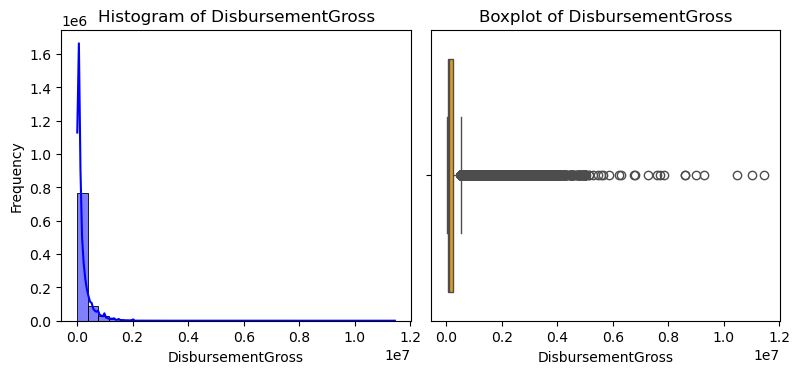

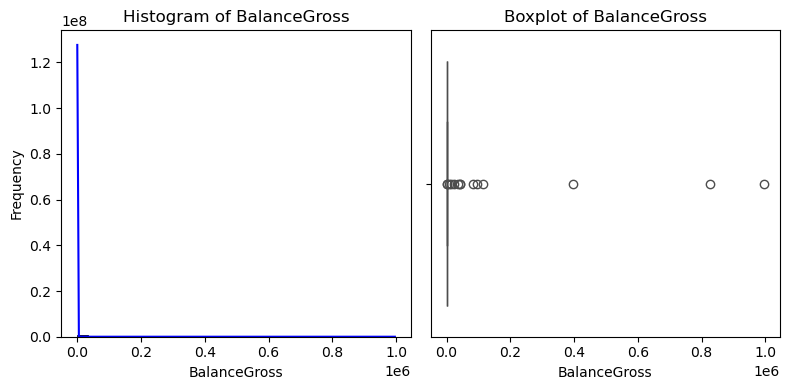

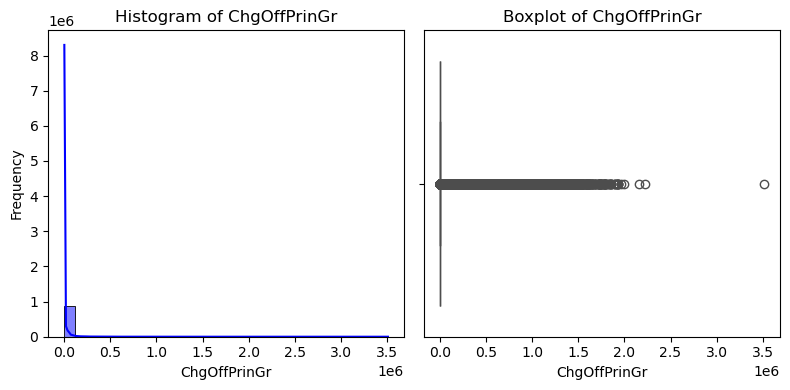

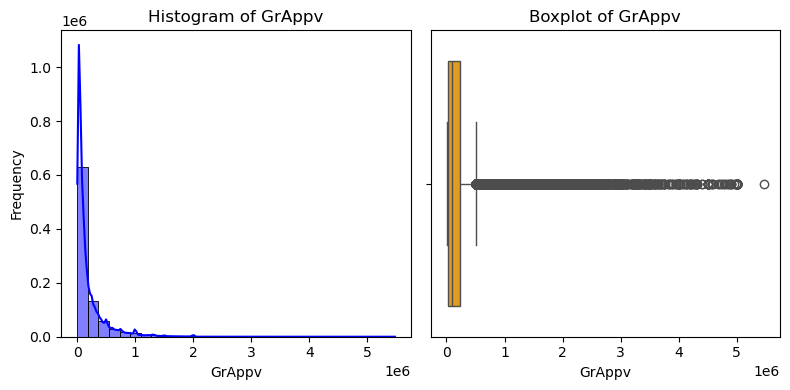

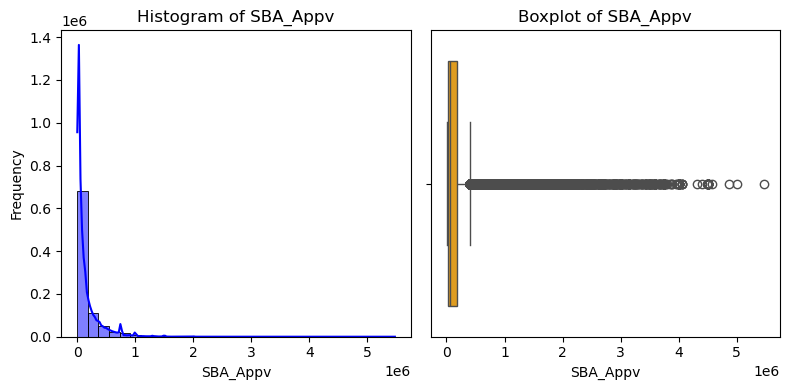

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric features for univariate analysis
numeric_features = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 
                    'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature], color='orange')
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature) 
    plt.tight_layout()
    plt.show()


## Univariate Analysis - Categorical Features

Explore the frequency distribution of categorical features.

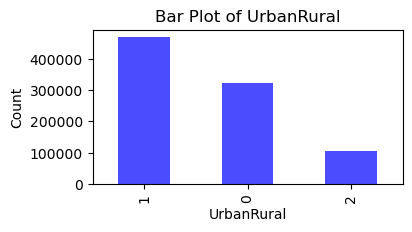

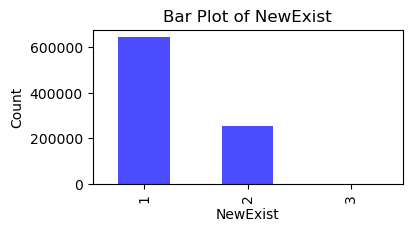

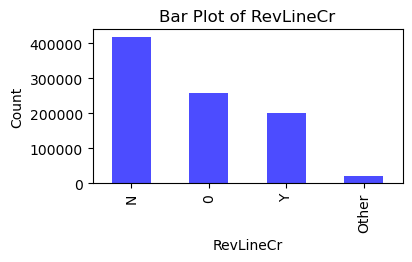

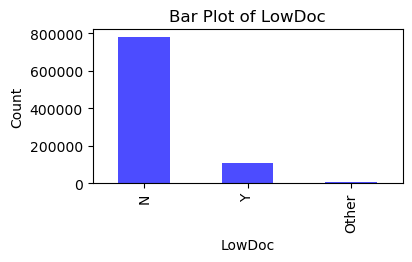

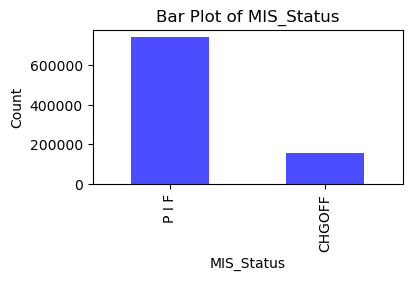

In [348]:
# List of categorical features for univariate analysis
categorical_features = ['UrbanRural', 'NewExist', 'RevLineCr', 'LowDoc', 'MIS_Status']

for feature in categorical_features:
    plt.figure(figsize=(4, 2))
    data[feature].value_counts().plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f"Bar Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    #plt.xticks(rotation=45)
    plt.show()


## Bivariate Analysis - Numeric Features vs Target (MIS_Status_Binary)

Use boxplots to see the distribution of numeric features for different MIS_Status_Binary classes (0 = P I F, 1 = CHGOFF).

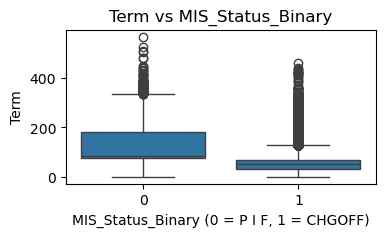

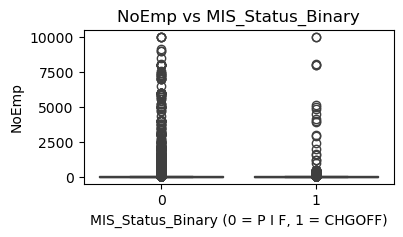

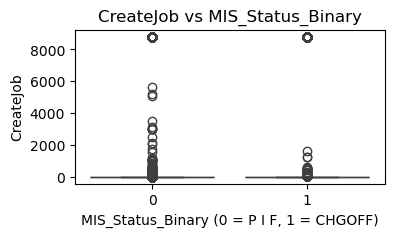

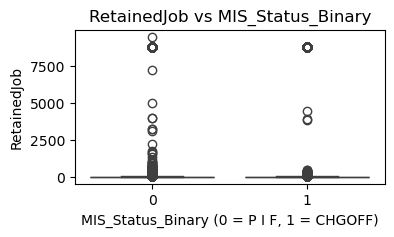

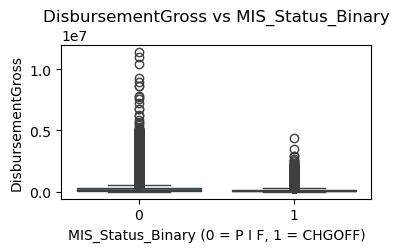

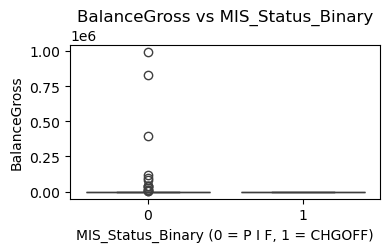

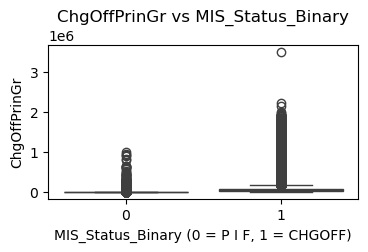

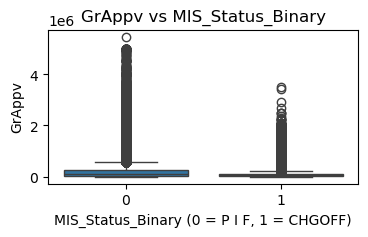

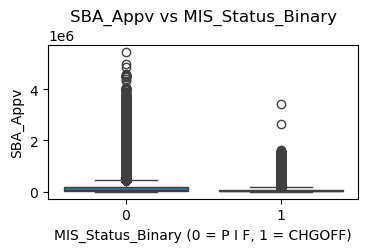

In [351]:
for feature in numeric_features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x='MIS_Status_Binary', y=feature, data=data)
    plt.title(f"{feature} vs MIS_Status_Binary")
    plt.xlabel("MIS_Status_Binary (0 = P I F, 1 = CHGOFF)")
    plt.ylabel(feature)
    plt.show()


## Bivariate Analysis - Categorical Features vs Target (MIS_Status_Binary)

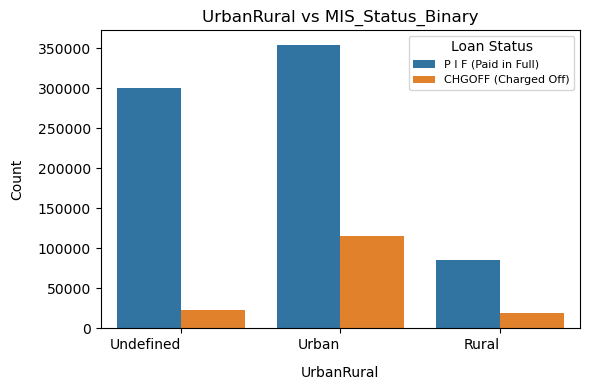

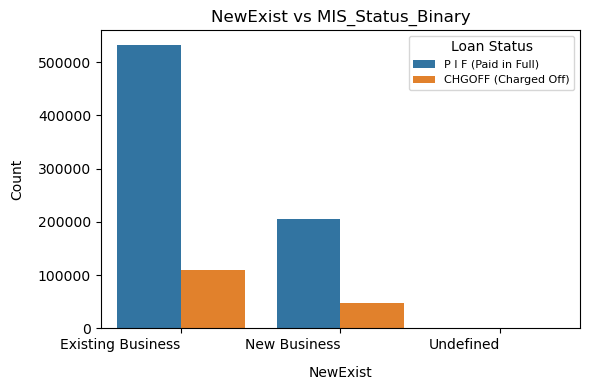

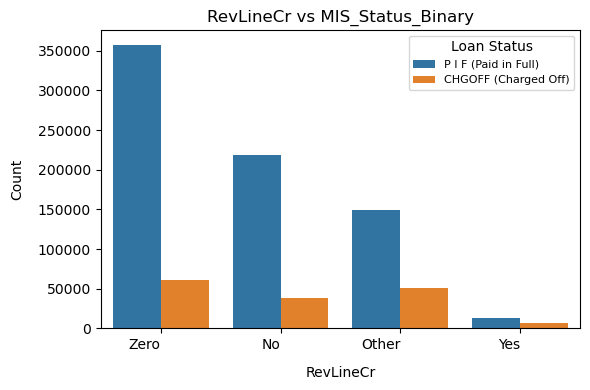

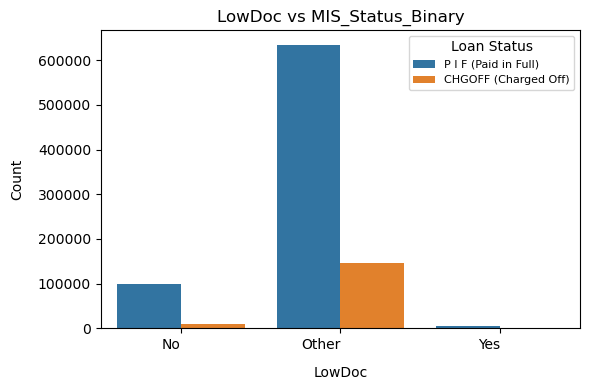

In [354]:
# Define mappings for categorical feature labels
category_labels = {
    'UrbanRural': {1: 'Urban', 2: 'Rural', 0: 'Undefined'},
    'NewExist': {1: 'Existing Business', 2: 'New Business', 3: 'Undefined'},
    'RevLineCr': {'Y': 'Yes', 'N': 'No', '0': 'Zero', 'Other': 'Other'},
    'LowDoc': {'Y': 'Yes', 'N': 'No', 'Other': 'Other'}
}

# Loop with warning fix
for feature in categorical_features[:-1]:  # Exclude MIS_Status from this loop
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x=feature,
        hue='MIS_Status_Binary',
        data=data,
        palette='tab10'  # Replace with any desired palette
    )
    plt.title(f"{feature} vs MIS_Status_Binary")
    plt.xlabel(feature, labelpad=10)
    plt.ylabel("Count",  labelpad=10)
    
    # Apply descriptive x-axis labels
    if feature in category_labels:
        unique_values = sorted(data[feature].dropna().unique())  # Sort unique values
        labels = [
            category_labels[feature].get(value, f"Unknown ({value})") for value in unique_values
        ]  # Map values to labels, fall back to 'Unknown' if not in category_labels
        ax.set_xticks(range(len(unique_values)))  # Set fixed positions
        ax.set_xticklabels(labels, fontsize=10)  # Apply descriptive labels


    # Rotate x-axis labels and customize legend
    plt.xticks(ha='right')
    legend_labels = ['P I F (Paid in Full)', 'CHGOFF (Charged Off)']
    plt.legend(title='Loan Status', labels=legend_labels, fontsize=8, loc='upper right')
    
    plt.tight_layout()
    plt.show()


## Correlation Matrix for Numeric Features - Analyze correlations between numeric features and MIS_Status_Binary.

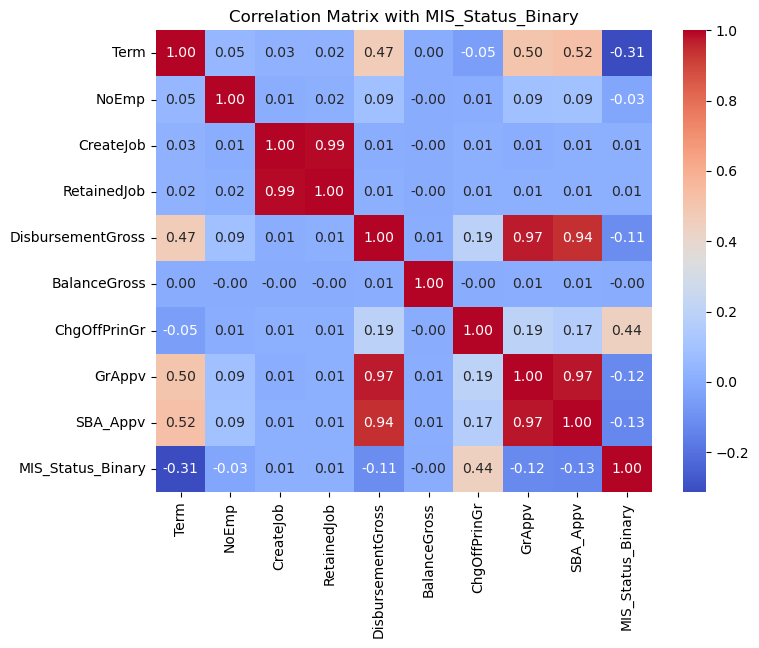

In [357]:
# Correlation matrix
correlation_matrix = data[numeric_features + ['MIS_Status_Binary']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix with MIS_Status_Binary")
plt.show()


## Model - 1: KNN

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Selected predictors
numeric_features = ['Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
categorical_features = ['UrbanRural', 'NewExist', 'LowDoc']

# Create dummy variables for categorical features
data_dummies = pd.get_dummies(data[categorical_features], drop_first=False)

# Combine numerical and dummy variables
X = pd.concat([data[numeric_features], data_dummies], axis=1)
y = data['MIS_Status_Binary']  # Target variable (binary: 0 for PIF, 1 for CHGOFF)


In [61]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [411]:
# Standardize the numerical features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])


## KNN - Select Hyperparameters Using Cross-Validation

In [69]:
param_grid = {
    'n_neighbors': range(3, 21, 2),  # Test odd values of k from 3 to 50
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Explore multiple distance metrics
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=3,
    scoring='f1',  # Use F1 scoring for imbalanced datasets
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5}


## KNN - Determine the Best Threshold

In [413]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# **Step 1: Predict Probabilities with KNN**
y_val_prob_knn = best_knn.predict_proba(X_val)[:, 1]  # Get probabilities for the positive class

# **Step 2: Determine the Best Threshold**
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_knn)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]
best_f1_score = f1_scores[best_f1_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-Score: {best_f1_score:.4f}")


Best Threshold: 0.4000
Best F1-Score: 0.9761


In [415]:
# **Step 3: Evaluate Metrics at the Best Threshold**
y_val_pred_knn = (y_val_prob_knn >= best_threshold).astype(int)

conf_matrix = confusion_matrix(y_val, y_val_pred_knn)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nSpecificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_knn))


Confusion Matrix:
[[146917   1005]
 [   511  31001]]

Specificity: 0.9932
Sensitivity (Recall): 0.9838
Accuracy: 0.9916

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    147922
           1       0.97      0.98      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



## ROC Curve

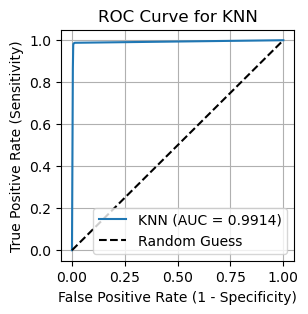

In [418]:
# **Step 4: Plot ROC Curve**
roc_auc = roc_auc_score(y_val, y_val_prob_knn)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_knn)

plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve for KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

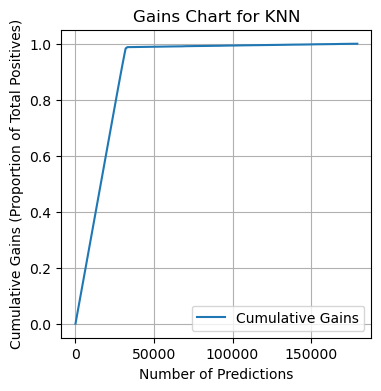

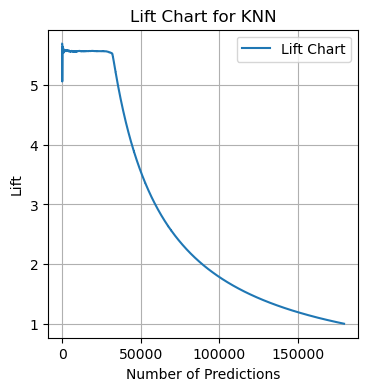

In [420]:
# **Step 5: Gains and Lift Charts**
sorted_indices = np.argsort(-y_val_prob_knn)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)

# Cumulative Gains
cumulative_gains = np.cumsum(sorted_actuals) / sum(y_val)

plt.figure(figsize=(4, 4))
plt.plot(range(1, len(cumulative_gains) + 1), cumulative_gains, label="Cumulative Gains")
plt.xlabel("Number of Predictions")
plt.ylabel("Cumulative Gains (Proportion of Total Positives)")
plt.title("Gains Chart for KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Lift Chart
lift = cumulative_gains / (np.arange(1, len(cumulative_gains) + 1) / len(y_val))

plt.figure(figsize=(4, 4))
plt.plot(range(1, len(lift) + 1), lift, label="Lift Chart")
plt.xlabel("Number of Predictions")
plt.ylabel("Lift")
plt.title("Lift Chart for KNN")
plt.legend(loc="upper right")
plt.grid()
plt.show()


## Incorporate Cost and Net Profit

In [423]:
# Ensure DisbursementGross is correctly mapped to the validation set
disbursement_knn = data.loc[X_val.index, "DisbursementGross"].values  # Use original data, not normalized

# **Step 6: Profit Analysis**
profit_vector_knn = []

# Iterate through actual and predicted values along with disbursement amounts
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_knn):
    if predicted == 0:  # Predicted Paid in Full (PIF)
        if actual == 0:  # Actual PIF
            profit_vector_knn.append(0.05 * gross)  # 5% profit
        else:  # Actual Default
            profit_vector_knn.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_knn.append(0)  # No profit or loss

# Calculate total net profit
total_net_profit_knn = sum(profit_vector_knn)

# Print the total net profit
print(f"Total Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_knn:.2f}")


Total Net Profit for Best Threshold (0.4000): $1586088755.55


## Model-2: Classification Trees

In [425]:
# Selected predictors
numeric_features = ['Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
categorical_features = ['UrbanRural', 'NewExist', 'LowDoc']

# Create dummy variables
data_dummies = pd.get_dummies(data[categorical_features], drop_first=True)

# Combine numerical and dummy variables
X = pd.concat([data[numeric_features], data_dummies], axis=1)

# Define target variable
y = data['MIS_Status_Binary']


In [427]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [429]:
# Standardize the numerical features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])


##  2.1. Single Classification Tree

## Hyperparameter Tuning

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [5, 10, 15, 20],  # Tree depth to control overfitting
    'min_samples_split': [2, 10, 20],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples per leaf node
    'min_impurity_decrease': [0.0, 0.01, 0.05],  # Stop splitting if impurity doesn't decrease
    'class_weight': ['balanced', None]  # Handle imbalanced datasets
}

# Perform Grid Search
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid_tree,
    scoring='f1',  # F1-score for imbalanced datasets
    cv=3,
    n_jobs=-1
)
grid_search_tree.fit(X_train, y_train)

# Best parameters
best_tree = grid_search_tree.best_estimator_
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)


Best Parameters for Decision Tree: {'class_weight': 'balanced', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [431]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, classification_report, roc_auc_score

# **Step 1: Predict Probabilities**
y_val_prob_tree = best_tree.predict_proba(X_val)[:, 1]  # Get probabilities for the positive class

# **Step 2: Determine the Best Threshold**
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_tree)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]
best_f1_score = f1_scores[best_f1_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-Score: {best_f1_score:.4f}")

Best Threshold: 0.8792
Best F1-Score: 0.9824


In [433]:
# **Step 3: Evaluate Metrics at the Best Threshold**
y_val_pred_tree = (y_val_prob_tree >= best_threshold).astype(int)

conf_matrix = confusion_matrix(y_val, y_val_pred_tree)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nSpecificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_tree))


Confusion Matrix:
[[146938    984]
 [   143  31369]]

Specificity: 0.9933
Sensitivity (Recall): 0.9955
Accuracy: 0.9937

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      1.00      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



## ROC Curve

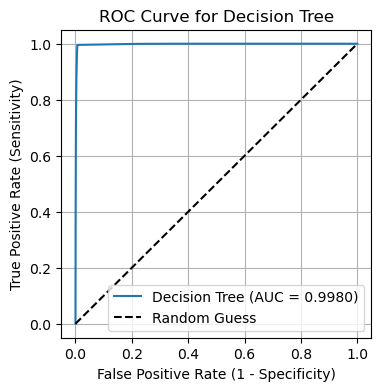

In [436]:
# **Step 4: ROC Curve**
roc_auc = roc_auc_score(y_val, y_val_prob_tree)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_tree)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()


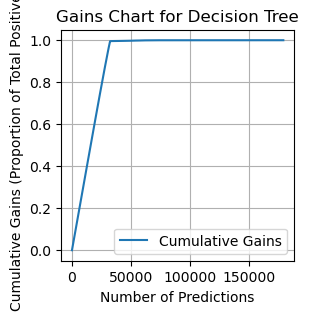

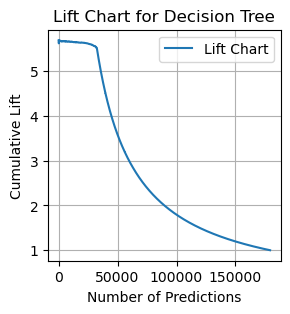

In [438]:
# **Step 5: Gains and Lift Charts**
sorted_indices = np.argsort(-y_val_prob_tree)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)

# Cumulative Gains
cumulative_gains = np.cumsum(sorted_actuals) / sum(y_val)

plt.figure(figsize=(3, 3))
plt.plot(range(1, len(cumulative_gains) + 1), cumulative_gains, label="Cumulative Gains")
plt.xlabel("Number of Predictions")
plt.ylabel("Cumulative Gains (Proportion of Total Positives)")
plt.title("Gains Chart for Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Lift Chart
lift = cumulative_gains / (np.arange(1, len(cumulative_gains) + 1) / len(y_val))

plt.figure(figsize=(3, 3))
plt.plot(range(1, len(lift) + 1), lift, label="Lift Chart")
plt.xlabel("Number of Predictions")
plt.ylabel("Cumulative Lift")
plt.title("Lift Chart for Decision Tree")
plt.legend(loc="upper right")
plt.grid()
plt.show()


## Incorporate Cost and Net Profit

In [441]:
# **Step 6: Profit Analysis**
# Ensure DisbursementGross is correctly mapped to the validation set using original data
disbursement_tree = data.loc[X_val.index, "DisbursementGross"].values  # Map from original data


profit_vector_tree = []
for actual, predicted, gross in zip(y_val, y_val_pred_tree, disbursement_tree):
    if predicted == 0:  # Predicted Paid in Full (PIF)
        if actual == 0:  # Actual PIF
            profit_vector_tree.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_tree.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_tree.append(0)  # No profit or loss

total_net_profit_tree = sum(profit_vector_tree)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_tree:.2f}")


Total Net Profit for Best Threshold (0.8792): $1589712241.60


## 2.2. Bagging Tree

## Hyperparameter Tuning

In [445]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Step 1 - Define Bagging Classifier
base_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Base classifier is a decision tree
bagging = BaggingClassifier(estimator=base_tree, random_state=42)


# Step 2 - Define Parameter Grid for Bagging
param_grid_bagging = {
    'n_estimators': [50, 100],  # Test fewer values
    'max_samples': [0.7, 1.0],  # Fewer proportions
    'max_features': [0.7],  # Fixed proportion for features
    'bootstrap': [True]  # Fix bootstrap to True
}

# Step 3 - Perform Grid Search with Cross-Validation
grid_search_bagging = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid_bagging,
    scoring='f1',  # F1-score for imbalanced datasets
    cv=3,
    n_jobs=-1
)
grid_search_bagging.fit(X_train, y_train)

# Best Parameters
best_bagging = grid_search_bagging.best_estimator_
print("Best Parameters for Bagging Trees:", grid_search_bagging.best_params_)

Best Parameters for Bagging Trees: {'bootstrap': True, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}


In [449]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for the positive class using the best Bagging model
y_val_prob_bagging = best_bagging.predict_proba(X_val)[:, 1]

# Step 4: Determine the Best Threshold
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_bagging)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
best_f1_index = f1_scores.argmax()
best_threshold = thresholds[best_f1_index]

print(f"Best F1-Score: {f1_scores[best_f1_index]:.4f}")
print(f"Best Precision-Recall Threshold: {best_threshold:.4f}")

Best F1-Score: 0.9823
Best Precision-Recall Threshold: 0.4473


In [451]:
# Step 2: Compute Metrics at the Best Threshold
y_val_pred_adjusted = (y_val_prob_bagging >= best_threshold).astype(int)
conf_matrix_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)

tn, fp, fn, tp = conf_matrix_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
sensitivity_adjusted = tp / (tp + fn)
accuracy_adjusted = (tp + tn) / (tp + tn + fp + fn)
f1_adjusted = f1_score(y_val, y_val_pred_adjusted)

print("\nConfusion Matrix for Best Threshold:")
print(conf_matrix_adjusted)
print(f"\nSpecificity: {specificity_adjusted:.4f}")
print(f"Sensitivity (Recall): {sensitivity_adjusted:.4f}")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")

print("\nClassification Report for Best Threshold:")
print(classification_report(y_val, y_val_pred_adjusted))



Confusion Matrix for Best Threshold:
[[146938    984]
 [   147  31365]]

Specificity: 0.9933
Sensitivity (Recall): 0.9953
Accuracy: 0.9937
F1-Score: 0.9823

Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      1.00      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



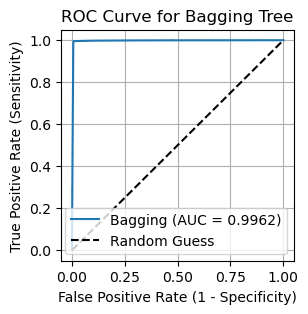

In [453]:
# Step 3: ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob_bagging)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_bagging)

plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, label=f'Bagging (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Bagging Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()


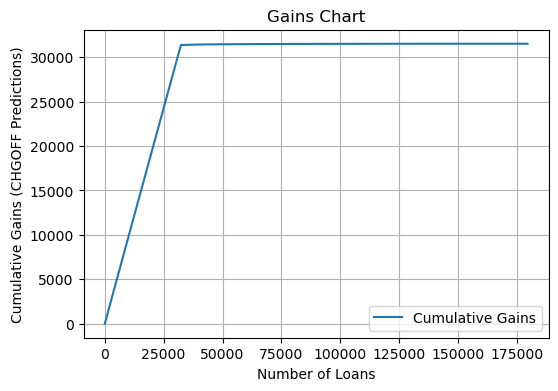

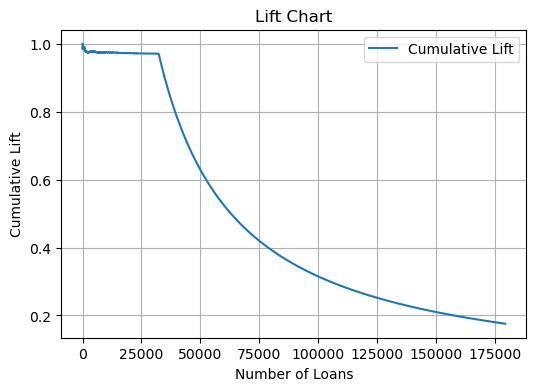

In [457]:
# Step 4: Gains and Lift Charts
sorted_indices = np.argsort(-y_val_prob_bagging)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)
sorted_disbursement = disbursement_tree[sorted_indices]  # Direct indexing for NumPy array

# Cumulative Gains
cumulative_actuals = np.cumsum(sorted_actuals)
cumulative_disbursement = np.cumsum(sorted_disbursement)

# Gains Chart
plt.figure(figsize=(6, 4))
plt.plot(range(len(cumulative_actuals)), cumulative_actuals, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Gains (CHGOFF Predictions)")
plt.legend()
plt.grid()
plt.show()

# Lift Chart
cumulative_lift = cumulative_actuals / (np.arange(1, len(cumulative_actuals) + 1))
plt.figure(figsize=(6, 4))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()


## Incorporate Cost and Net Profit

In [459]:
# Step 5: Profit Analysis for Best Threshold
profit_vector_adjusted = []
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_tree):
    if predicted == 0:  # Predicted PIF
        if actual == 0:  # Actual PIF
            profit_vector_adjusted.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_adjusted.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_adjusted.append(0)  # No profit/loss

total_net_profit_adjusted = sum(profit_vector_adjusted)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_adjusted:.2f}")



Total Net Profit for Best Threshold (0.4473): $1589514182.10


## 2.3. Boosting Tree

## Hyperparameter Tuning

In [463]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Step 1 - Define Gradient Boosting Classifier
boosting = GradientBoostingClassifier(random_state=42)

# Step 2 - Define Parameter Grid for Gradient Boosting
param_grid_boosting = {
    'n_estimators': [50, 100],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 5],  # Maximum depth of individual trees
    'subsample': [0.7, 1.0],  # Fraction of samples used for training each tree
}

# Step 3 - Perform Grid Search with Cross-Validation
grid_search_boosting = GridSearchCV(
    estimator=boosting,
    param_grid=param_grid_boosting,
    scoring='f1',  # F1-score for imbalanced datasets
    cv=3,
    n_jobs=-1
)
grid_search_boosting.fit(X_train, y_train)

# Best Parameters
best_boosting = grid_search_boosting.best_estimator_
print("Best Parameters for Boosting Trees:", grid_search_boosting.best_params_)

# Step 4 - Determine the Best Threshold
y_val_prob_boosting = best_boosting.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_boosting)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_f1_index = f1_scores.argmax()
best_threshold = thresholds[best_f1_index]

print(f"Best F1-Score: {f1_scores[best_f1_index]:.4f}")
print(f"Best Precision-Recall Threshold: {best_threshold:.4f}")


Best Parameters for Boosting Trees: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best F1-Score: 0.9824
Best Precision-Recall Threshold: 0.3718


In [465]:
# Step 5 - Compute Metrics at the Best Threshold
y_val_pred_adjusted = (y_val_prob_boosting >= best_threshold).astype(int)
conf_matrix_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)

tn, fp, fn, tp = conf_matrix_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
sensitivity_adjusted = tp / (tp + fn)
accuracy_adjusted = (tp + tn) / (tp + tn + fp + fn)
f1_adjusted = f1_score(y_val, y_val_pred_adjusted)

print("\nConfusion Matrix for Best Threshold:")
print(conf_matrix_adjusted)
print(f"\nSpecificity: {specificity_adjusted:.4f}")
print(f"Sensitivity (Recall): {sensitivity_adjusted:.4f}")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")

print("\nClassification Report for Best Threshold:")
print(classification_report(y_val, y_val_pred_adjusted))



Confusion Matrix for Best Threshold:
[[146937    985]
 [   142  31370]]

Specificity: 0.9933
Sensitivity (Recall): 0.9955
Accuracy: 0.9937
F1-Score: 0.9824

Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      1.00      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



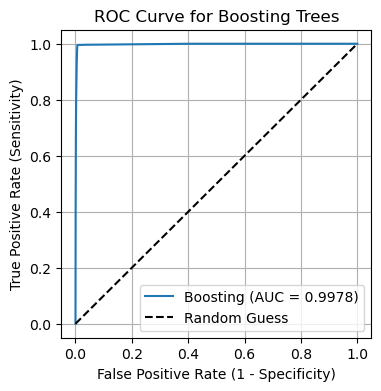

In [467]:
# Step 6 - ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob_boosting)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_boosting)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'Boosting (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Boosting Trees')
plt.legend(loc='lower right')
plt.grid()
plt.show()

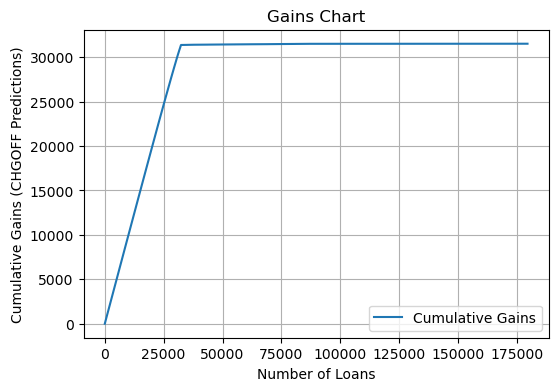

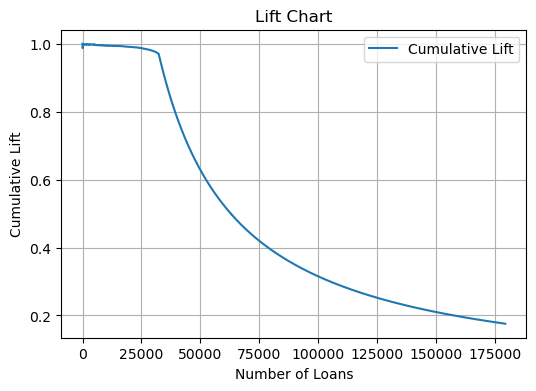

In [471]:
# Step 7 - Gains and Lift Charts
sorted_indices = np.argsort(-y_val_prob_boosting)  # Sorting probabilities in descending order
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)  # Sorting actuals
sorted_disbursement = disbursement_tree[sorted_indices]  # Direct indexing for NumPy array

# Cumulative Gains
cumulative_actuals = np.cumsum(sorted_actuals)
cumulative_disbursement = np.cumsum(sorted_disbursement)

# Gains Chart
plt.figure(figsize=(6, 4))
plt.plot(range(len(cumulative_actuals)), cumulative_actuals, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Gains (CHGOFF Predictions)")
plt.legend()
plt.grid()
plt.show()

# Lift Chart
cumulative_lift = cumulative_actuals / (np.arange(1, len(cumulative_actuals) + 1))
plt.figure(figsize=(6, 4))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()


## Incorporate Cost and Net Profit

In [474]:
# Step 8 - Profit Analysis for Best Threshold
profit_vector_adjusted = []
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_tree):
    if predicted == 0:  # Predicted PIF
        if actual == 0:  # Actual PIF
            profit_vector_adjusted.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_adjusted.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_adjusted.append(0)  # No profit/loss

total_net_profit_adjusted = sum(profit_vector_adjusted)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_adjusted:.2f}")


Total Net Profit for Best Threshold (0.3718): $1589736591.60


## 2.4. Random Forest

## Hyperparameter Tuning

In [476]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Step 1 - Define Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 2 - Define Parameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [10, 15, None],  # Maximum depth of each tree
    'max_features': ['sqrt', 'log2'],  # Number of features considered for splitting
    'min_samples_split': [2, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Step 3 - Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid_rf,
    scoring='f1',  # F1-score for imbalanced datasets
    cv=3,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)

# Best Parameters
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [478]:
# Step 4 - Determine the Best Threshold
y_val_prob_rf = best_rf.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_rf)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_f1_index = f1_scores.argmax()
best_threshold = thresholds[best_f1_index]

print(f"Best F1-Score: {f1_scores[best_f1_index]:.4f}")
print(f"Best Precision-Recall Threshold: {best_threshold:.4f}")

Best F1-Score: 0.9823
Best Precision-Recall Threshold: 0.4704


In [480]:
# Step 5 - Compute Metrics at the Best Threshold
y_val_pred_adjusted = (y_val_prob_rf >= best_threshold).astype(int)
conf_matrix_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)

tn, fp, fn, tp = conf_matrix_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
sensitivity_adjusted = tp / (tp + fn)
accuracy_adjusted = (tp + tn) / (tp + tn + fp + fn)
f1_adjusted = f1_score(y_val, y_val_pred_adjusted)

print("\nConfusion Matrix for Best Threshold:")
print(conf_matrix_adjusted)
print(f"\nSpecificity: {specificity_adjusted:.4f}")
print(f"Sensitivity (Recall): {sensitivity_adjusted:.4f}")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")

print("\nClassification Report for Best Threshold:")
print(classification_report(y_val, y_val_pred_adjusted))



Confusion Matrix for Best Threshold:
[[146935    987]
 [   141  31371]]

Specificity: 0.9933
Sensitivity (Recall): 0.9955
Accuracy: 0.9937
F1-Score: 0.9823

Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      1.00      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



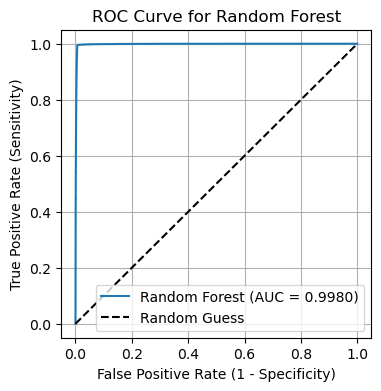

In [482]:
# Step 6 - ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob_rf)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_rf)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

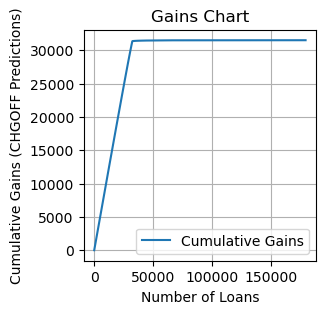

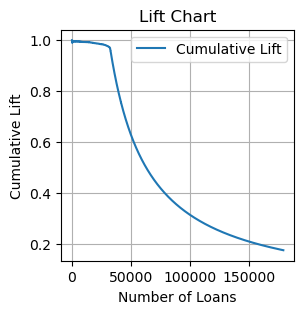

In [484]:
# Step 7 - Gains and Lift Charts
sorted_indices = np.argsort(-y_val_prob_rf)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)
sorted_disbursement = disbursement_tree[sorted_indices]

# Cumulative Gains
cumulative_actuals = np.cumsum(sorted_actuals)
cumulative_disbursement = np.cumsum(sorted_disbursement)

# Gains Chart
plt.figure(figsize=(3, 3))
plt.plot(range(len(cumulative_actuals)), cumulative_actuals, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Gains (CHGOFF Predictions)")
plt.legend()
plt.grid()
plt.show()

# Lift Chart
cumulative_lift = cumulative_actuals / (np.arange(1, len(cumulative_actuals) + 1))
plt.figure(figsize=(3, 3))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()


## Incorporate Cost and Net Profit

In [489]:
# Step 8 - Profit Analysis for Best Threshold
profit_vector_adjusted = []
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_tree):
    if predicted == 0:  # Predicted PIF
        if actual == 0:  # Actual PIF
            profit_vector_adjusted.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_adjusted.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_adjusted.append(0)  # No profit/loss

total_net_profit_adjusted = sum(profit_vector_adjusted)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_adjusted:.2f}")



Total Net Profit for Best Threshold (0.4704): $1589844341.60


## Model - 3: Logit model (including Lasso, Ridge, and ElasticNet)

## 3.1. Logistic Regression (Logit) Base Model

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selected predictors
numeric_features = ['Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
categorical_features = ['UrbanRural', 'NewExist', 'LowDoc']

# Create dummy variables
data_dummies = pd.get_dummies(data[categorical_features], drop_first=True)

# Combine numerical and dummy variables
X = pd.concat([data[numeric_features], data_dummies], axis=1)

# Define target variable
y = data['MIS_Status_Binary']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])


In [495]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define Logistic Regression model
logit = LogisticRegression(random_state=42, class_weight='balanced', solver='lbfgs', max_iter=1000)

# Fit the model
logit.fit(X_train, y_train)

# Predict probabilities
y_val_prob_logit = logit.predict_proba(X_val)[:, 1]

# Precision-Recall Curve and Best Threshold
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_logit)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_f1_index = f1_scores.argmax()
best_threshold = thresholds[best_f1_index]

print(f"Best F1-Score: {f1_scores[best_f1_index]:.4f}")
print(f"Best Precision-Recall Threshold: {best_threshold:.4f}")


Best F1-Score: 0.9781
Best Precision-Recall Threshold: 0.3708


In [497]:
# Step 5 - Evaluate Metrics at the Best Threshold
y_val_pred_adjusted = (y_val_prob_logit >= best_threshold).astype(int)
conf_matrix_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)

tn, fp, fn, tp = conf_matrix_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
sensitivity_adjusted = tp / (tp + fn)
accuracy_adjusted = (tp + tn) / (tp + tn + fp + fn)

print("\nConfusion Matrix for Best Threshold:")
print(conf_matrix_adjusted)
print(f"\nSpecificity: {specificity_adjusted:.4f}")
print(f"Sensitivity (Recall): {sensitivity_adjusted:.4f}")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"F1-Score: {f1_scores[best_f1_index]:.4f}")

print("\nClassification Report for Best Threshold:")
print(classification_report(y_val, y_val_pred_adjusted))



Confusion Matrix for Best Threshold:
[[146961    961]
 [   433  31079]]

Specificity: 0.9935
Sensitivity (Recall): 0.9863
Accuracy: 0.9922
F1-Score: 0.9781

Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      0.99      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



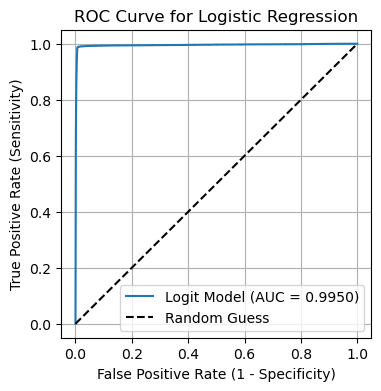

In [499]:
# Step 6 - ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob_logit)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_logit)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f"Logit Model (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

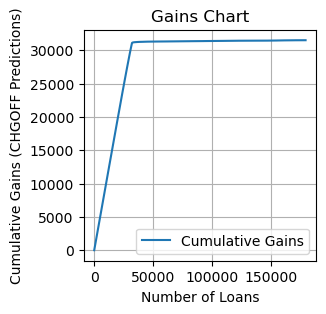

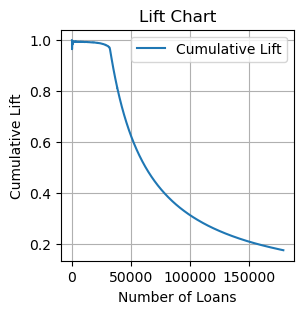

In [501]:
# Step 7 - Gains and Lift Charts
sorted_indices = np.argsort(-y_val_prob_logit)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)
sorted_disbursement = disbursement_tree[sorted_indices]

# Cumulative Gains
cumulative_actuals = np.cumsum(sorted_actuals)
cumulative_disbursement = np.cumsum(sorted_disbursement)

# Gains Chart
plt.figure(figsize=(3, 3))
plt.plot(range(len(cumulative_actuals)), cumulative_actuals, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Gains (CHGOFF Predictions)")
plt.legend()
plt.grid()
plt.show()

# Lift Chart
cumulative_lift = cumulative_actuals / (np.arange(1, len(cumulative_actuals) + 1))
plt.figure(figsize=(3, 3))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()

## Incorporate Cost and Net Profit

In [504]:
# Step 8 - Profit Analysis for Best Threshold
profit_vector_adjusted = []
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_tree):
    if predicted == 0:  # Predicted Paid in Full (PIF)
        if actual == 0:  # Actual PIF
            profit_vector_adjusted.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_adjusted.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_adjusted.append(0)  # No profit/loss

total_net_profit_adjusted = sum(profit_vector_adjusted)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_adjusted:.2f}")



Total Net Profit for Best Threshold (0.3708): $1579861133.90


## 3.2: Logistic Regression with L1 Regularization

In [507]:
from sklearn.model_selection import GridSearchCV

# Define Lasso (L1 Regularization) model
lasso = LogisticRegression(penalty='l1', solver='saga', class_weight='balanced', max_iter=1000, random_state=42)

# Hyperparameter tuning
param_grid_lasso = {'C': [0.01, 0.1, 1, 10]}  # C is the inverse of regularization strength
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, scoring='f1', cv=3, n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Lasso Logistic Regression:", grid_search_lasso.best_params_)

# Evaluate best model
best_lasso = grid_search_lasso.best_estimator_
y_val_prob_lasso = best_lasso.predict_proba(X_val)[:, 1]

# Determine best threshold and evaluate
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_lasso)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_f1_index = f1_scores.argmax()
best_threshold = thresholds[best_f1_index]

print(f"Best F1-Score for Lasso: {f1_scores[best_f1_index]:.4f}")
print(f"Best Precision-Recall Threshold for Lasso: {best_threshold:.4f}")


Best Parameters for Lasso Logistic Regression: {'C': 10}
Best F1-Score for Lasso: 0.9781
Best Precision-Recall Threshold for Lasso: 0.3699


In [511]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, f1_score

# Step 1: Compute Metrics at the Best Threshold
y_val_pred_adjusted = (y_val_prob_lasso >= best_threshold).astype(int)  # Adjust predictions based on best threshold

# Confusion Matrix for adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)
print("\nConfusion Matrix for Best Threshold:")
print(conf_matrix_adjusted)

# Extract confusion matrix metrics
tn, fp, fn, tp = conf_matrix_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
sensitivity_adjusted = tp / (tp + fn)
accuracy_adjusted = (tp + tn) / (tp + tn + fp + fn)
f1_adjusted = f1_score(y_val, y_val_pred_adjusted)

print(f"\nSpecificity: {specificity_adjusted:.4f}")
print(f"Sensitivity (Recall): {sensitivity_adjusted:.4f}")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")

# Classification Report for the best threshold
print("\nClassification Report for Best Threshold:")
print(classification_report(y_val, y_val_pred_adjusted))



Confusion Matrix for Best Threshold:
[[146960    962]
 [   431  31081]]

Specificity: 0.9935
Sensitivity (Recall): 0.9863
Accuracy: 0.9922
F1-Score: 0.9781

Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      0.99      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



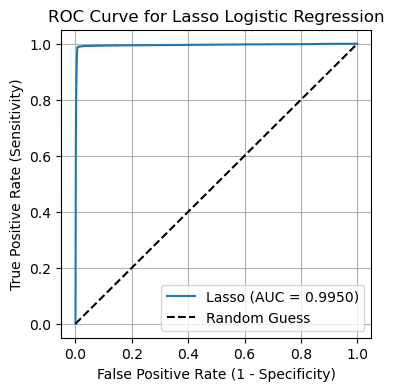

In [513]:
# Step 2: ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob_lasso)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_lasso)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'Lasso (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Lasso Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

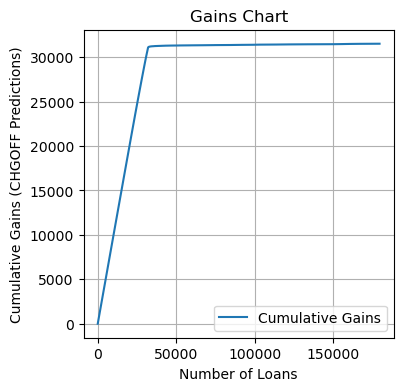

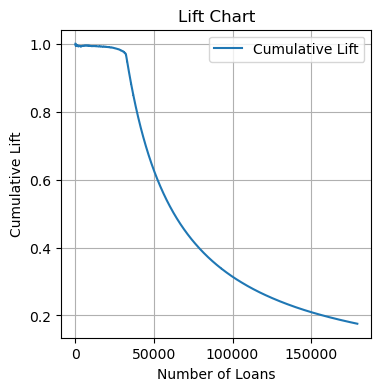

In [515]:
# Step 3: Gains and Lift Charts
sorted_indices = np.argsort(-y_val_prob_lasso)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)
sorted_disbursement = disbursement_tree[sorted_indices]
# Cumulative Gains
cumulative_actuals = np.cumsum(sorted_actuals)
cumulative_disbursement = np.cumsum(sorted_disbursement)

# Gains Chart
plt.figure(figsize=(4, 4))
plt.plot(range(len(cumulative_actuals)), cumulative_actuals, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Gains (CHGOFF Predictions)")
plt.legend()
plt.grid()
plt.show()

# Lift Chart
cumulative_lift = cumulative_actuals / (np.arange(1, len(cumulative_actuals) + 1))
plt.figure(figsize=(4, 4))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()

## Incorporate Cost and Net Profit

In [518]:
# Step 4: Profit Analysis for Best Threshold
profit_vector_adjusted = []
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_tree):
    if predicted == 0:  # Predicted PIF
        if actual == 0:  # Actual PIF
            profit_vector_adjusted.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_adjusted.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_adjusted.append(0)  # No profit/loss

total_net_profit_adjusted = sum(profit_vector_adjusted)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_adjusted:.2f}")


Total Net Profit for Best Threshold (0.3699): $1579845264.65


## 3.3: Logistic Regression with L2 Regularization

In [520]:
# Define Ridge Logistic Regression (L2 Regularization) model
ridge = LogisticRegression(penalty='l2', solver='saga', class_weight='balanced', max_iter=1000, random_state=42)

# Hyperparameter tuning
param_grid_ridge = {'C': [0.01, 0.1, 1, 10]}  # C is the inverse of regularization strength
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='f1', cv=3, n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Ridge Logistic Regression:", grid_search_ridge.best_params_)

# Evaluate best model
best_ridge = grid_search_ridge.best_estimator_
y_val_prob_ridge = best_ridge.predict_proba(X_val)[:, 1]

# Determine best threshold and evaluate
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_ridge)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_f1_index = f1_scores.argmax()
best_threshold = thresholds[best_f1_index]

print(f"Best F1-Score for Ridge: {f1_scores[best_f1_index]:.4f}")
print(f"Best Precision-Recall Threshold for Ridge: {best_threshold:.4f}")


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Ridge Logistic Regression: {'C': 10}
Best F1-Score for Ridge: 0.9781
Best Precision-Recall Threshold for Ridge: 0.3700


In [522]:
# Compute Metrics at Best Threshold
y_val_pred_adjusted = (y_val_prob_ridge >= best_threshold).astype(int)
conf_matrix_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)

tn, fp, fn, tp = conf_matrix_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
sensitivity_adjusted = tp / (tp + fn)
accuracy_adjusted = (tp + tn) / (tp + tn + fp + fn)
f1_adjusted = f1_score(y_val, y_val_pred_adjusted)

print("\nConfusion Matrix for Best Threshold:")
print(conf_matrix_adjusted)
print(f"\nSpecificity: {specificity_adjusted:.4f}")
print(f"Sensitivity (Recall): {sensitivity_adjusted:.4f}")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")

print("\nClassification Report for Best Threshold:")
print(classification_report(y_val, y_val_pred_adjusted))


Confusion Matrix for Best Threshold:
[[146959    963]
 [   431  31081]]

Specificity: 0.9935
Sensitivity (Recall): 0.9863
Accuracy: 0.9922
F1-Score: 0.9781

Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      0.99      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



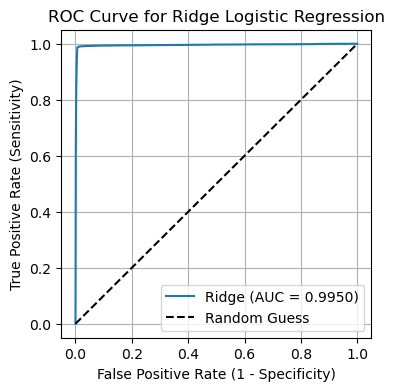

In [524]:
# ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob_ridge)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_ridge)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'Ridge (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Ridge Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

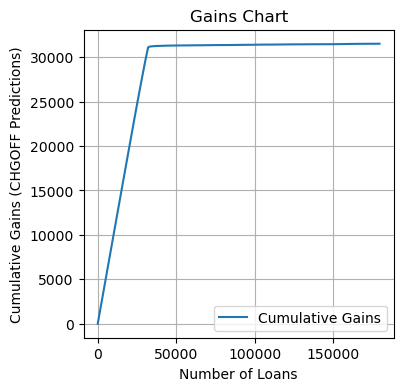

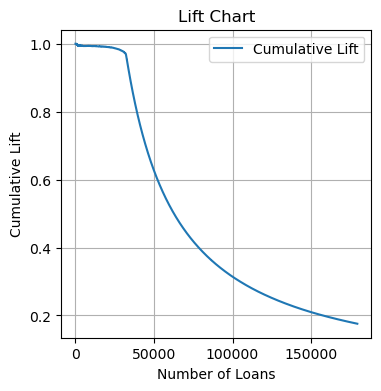

In [526]:
# Gains and Lift Charts
sorted_indices = np.argsort(-y_val_prob_ridge)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)
sorted_disbursement = disbursement_tree[sorted_indices]

# Cumulative Gains
cumulative_actuals = np.cumsum(sorted_actuals)
cumulative_disbursement = np.cumsum(sorted_disbursement)

# Gains Chart
plt.figure(figsize=(4, 4))
plt.plot(range(len(cumulative_actuals)), cumulative_actuals, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Gains (CHGOFF Predictions)")
plt.legend()
plt.grid()
plt.show()

# Lift Chart
cumulative_lift = cumulative_actuals / (np.arange(1, len(cumulative_actuals) + 1))
plt.figure(figsize=(4, 4))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()


## Incorporate Cost and Net Profit

In [529]:
# Profit Analysis for Best Threshold
profit_vector_adjusted = []
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_tree):
    if predicted == 0:  # Predicted PIF
        if actual == 0:  # Actual PIF
            profit_vector_adjusted.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_adjusted.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_adjusted.append(0)  # No profit/loss

total_net_profit_adjusted = sum(profit_vector_adjusted)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_adjusted:.2f}")


Total Net Profit for Best Threshold (0.3700): $1579842514.65


## 3.4: Logistic Regression with ElasticNet Regularization

In [531]:
# Step 1: Define Elastic Net Logistic Regression model
elastic_net = LogisticRegression(
    penalty='elasticnet',
    solver='saga',  # SAGA solver supports elastic net regularization
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Step 2: Define Hyperparameter Grid for Elastic Net
param_grid_en = {
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'l1_ratio': [0.1, 0.5, 0.9]  # Balance between L1 and L2 regularization
}

# Step 3: Perform Grid Search with Cross-Validation
grid_search_en = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid_en,
    scoring='f1',  # F1-score to handle imbalanced datasets
    cv=3,
    n_jobs=-1
)
grid_search_en.fit(X_train, y_train)

# Best Parameters
best_en = grid_search_en.best_estimator_
print("Best Parameters for Elastic Net Logistic Regression:", grid_search_en.best_params_)

# Step 4: Evaluate the Best Elastic Net Model
y_val_prob_en = best_en.predict_proba(X_val)[:, 1]

# Step 5: Determine the Best Threshold
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_en)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_f1_index = f1_scores.argmax()
best_threshold = thresholds[best_f1_index]

print(f"Best F1-Score for Elastic Net: {f1_scores[best_f1_index]:.4f}")
print(f"Best Precision-Recall Threshold for Elastic Net: {best_threshold:.4f}")


Best Parameters for Elastic Net Logistic Regression: {'C': 10, 'l1_ratio': 0.9}
Best F1-Score for Elastic Net: 0.9781
Best Precision-Recall Threshold for Elastic Net: 0.3699


In [533]:
# Step 6: Compute Metrics at the Best Threshold
y_val_pred_adjusted = (y_val_prob_en >= best_threshold).astype(int)
conf_matrix_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)

tn, fp, fn, tp = conf_matrix_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
sensitivity_adjusted = tp / (tp + fn)
accuracy_adjusted = (tp + tn) / (tp + tn + fp + fn)
f1_adjusted = f1_scores[best_f1_index]

print("\nConfusion Matrix for Best Threshold:")
print(conf_matrix_adjusted)
print(f"\nSpecificity: {specificity_adjusted:.4f}")
print(f"Sensitivity (Recall): {sensitivity_adjusted:.4f}")
print(f"Accuracy: {accuracy_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")

print("\nClassification Report for Best Threshold:")
print(classification_report(y_val, y_val_pred_adjusted))


Confusion Matrix for Best Threshold:
[[146960    962]
 [   431  31081]]

Specificity: 0.9935
Sensitivity (Recall): 0.9863
Accuracy: 0.9922
F1-Score: 0.9781

Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      0.99      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



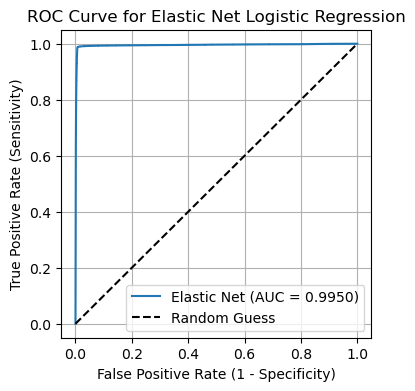

In [535]:
# Step 7: ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob_en)
fpr, tpr, _ = roc_curve(y_val, y_val_prob_en)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'Elastic Net (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Elastic Net Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

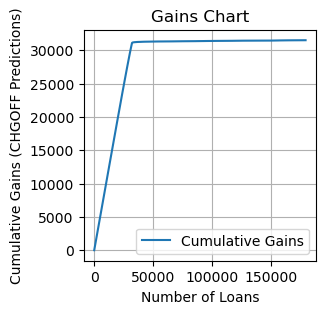

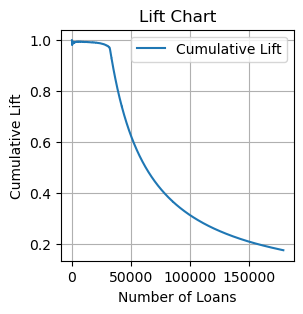

In [537]:
# Step 8: Gains and Lift Charts
sorted_indices = np.argsort(-y_val_prob_en)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)
sorted_disbursement = disbursement_tree[sorted_indices]

# Cumulative Gains
cumulative_actuals = np.cumsum(sorted_actuals)
cumulative_disbursement = np.cumsum(sorted_disbursement)

# Gains Chart
plt.figure(figsize=(3, 3))
plt.plot(range(len(cumulative_actuals)), cumulative_actuals, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Gains (CHGOFF Predictions)")
plt.legend()
plt.grid()
plt.show()

# Lift Chart
cumulative_lift = cumulative_actuals / (np.arange(1, len(cumulative_actuals) + 1))
plt.figure(figsize=(3, 3))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()

## Incorporate Cost and Net Profit

In [540]:
# Step 9: Profit Analysis for Best Threshold
profit_vector_adjusted = []
for actual, predicted, gross in zip(y_val, y_val_pred_adjusted, disbursement_tree):
    if predicted == 0:  # Predicted PIF
        if actual == 0:  # Actual PIF
            profit_vector_adjusted.append(0.05 * gross)  # 5% profit
        else:  # Actual CHGOFF
            profit_vector_adjusted.append(-5 * 0.05 * gross)  # Loss
    else:  # Predicted Default
        profit_vector_adjusted.append(0)  # No profit/loss

total_net_profit_adjusted = sum(profit_vector_adjusted)
print(f"\nTotal Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit_adjusted:.2f}")


Total Net Profit for Best Threshold (0.3699): $1579845264.65


## Model - 4: Neural networks

In [542]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# **Step 1: Preprocessing the Data**

# Select predictors
numeric_features = ['Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
categorical_features = ['UrbanRural', 'NewExist', 'LowDoc']

# Create dummy variables
data_dummies = pd.get_dummies(data[categorical_features], drop_first=True)

# Combine numerical and dummy variables
X = pd.concat([data[numeric_features], data_dummies], axis=1)

# Define the target variable
y = data['MIS_Status_Binary']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])


## 4.1. Base Neural Network (Without Regularization and Dropout):

In [545]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [547]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]  # Include early stopping callback
)


Epoch 1/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 11s 449us/step - accuracy: 0.9860 - loss: 0.0496 - val_accuracy: 0.9925 - val_loss: 0.0328
Epoch 2/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 388us/step - accuracy: 0.9925 - loss: 0.0324 - val_accuracy: 0.9923 - val_loss: 0.0327
Epoch 3/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 8s 365us/step - accuracy: 0.9929 - loss: 0.0312 - val_accuracy: 0.9928 - val_loss: 0.0308
Epoch 4/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 8s 348us/step - accuracy: 0.9929 - loss: 0.0309 - val_accuracy: 0.9926 - val_loss: 0.0328
Epoch 5/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 8s 344us/step - accuracy: 0.9930 - loss: 0.0303 - val_accuracy: 0.9929 - val_loss: 0.0305
Epoch 6/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 8s 367us/step - accuracy: 0.9931 - loss: 0.0299 - val_accuracy: 0.9931 - val_loss: 0.0292
Epoch 7/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 8s 371us/step - accuracy: 0.9931 - loss: 0.0298 - val_accuracy: 0.9928 - val_loss: 0.0318
Epoch 8/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 8s 364us/step - a

In [549]:
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_val_prob = model.predict(X_val).flatten()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)

# Compute F1-Score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Small epsilon to avoid division by zero

# Find the threshold with the maximum F1-Score
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]

# Adjust predictions using the best threshold
y_val_pred_adjusted = (y_val_prob >= best_threshold).astype(int)

# Evaluate metrics for the selected threshold
conf_matrix = confusion_matrix(y_val, y_val_pred_adjusted)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = f1_score(y_val, y_val_pred_adjusted)

# Print results
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_adjusted))


5608/5608 ━━━━━━━━━━━━━━━━━━━━ 1s 211us/step
Best Threshold: 0.1802
Confusion Matrix:
[[146949    973]
 [   224  31288]]
Specificity: 0.9934
Sensitivity (Recall): 0.9929
Accuracy: 0.9933
F1-Score: 0.9812

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      0.99      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



## Incorporate Cost and Net Profit

In [551]:
def calculate_net_profit(y_true, y_pred, disbursement):
    profit_vector = []
    for actual, predicted, gross in zip(y_true, y_pred, disbursement):
        if predicted == 0:  # Predicted Paid in Full
            if actual == 0:  # Actual Paid in Full
                profit_vector.append(0.05 * gross)  # 5% profit
            else:  # Actual Default
                profit_vector.append(-5 * 0.05 * gross)  # Loss
        else:  # Predicted Default
            profit_vector.append(0)  # No profit/loss
    return sum(profit_vector)

# Calculate net profit at the best threshold
y_val_pred_adjusted = (y_val_prob >= best_threshold).astype(int)  # Adjust predictions using best threshold
total_net_profit = calculate_net_profit(y_val, y_val_pred_adjusted, disbursement_tree)

# Print the total net profit
print(f"Total Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit:.2f}")


Total Net Profit for Best Threshold (0.1802): $1586310134.45


## 4.2. Regularized Neural Network (With L2 Regularization and Dropout)

In [553]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define neural network model with regularization and dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Dropout with 30% rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Dropout with 30% rate
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Dropout with 30% rate
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Display the model architecture
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [555]:
# **Step 2: Train the Model**
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])


Epoch 1/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 10s 414us/step - accuracy: 0.9806 - loss: 0.1073 - val_accuracy: 0.9913 - val_loss: 0.0534
Epoch 2/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 403us/step - accuracy: 0.9898 - loss: 0.0606 - val_accuracy: 0.9902 - val_loss: 0.0535
Epoch 3/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 406us/step - accuracy: 0.9903 - loss: 0.0576 - val_accuracy: 0.9921 - val_loss: 0.0488
Epoch 4/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 417us/step - accuracy: 0.9901 - loss: 0.0576 - val_accuracy: 0.9925 - val_loss: 0.0474
Epoch 5/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 405us/step - accuracy: 0.9903 - loss: 0.0559 - val_accuracy: 0.9842 - val_loss: 0.0746
Epoch 6/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 400us/step - accuracy: 0.9904 - loss: 0.0564 - val_accuracy: 0.9919 - val_loss: 0.0481
Epoch 7/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 419us/step - accuracy: 0.9905 - loss: 0.0547 - val_accuracy: 0.9921 - val_loss: 0.0477
Epoch 8/50
22430/22430 ━━━━━━━━━━━━━━━━━━━━ 9s 402us/step - a

In [557]:
# **Step 3: Predict Probabilities**
y_val_prob = model.predict(X_val).flatten()

# **Step 4: Select Optimal Threshold (Based on F1-Score)**
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]

print(f"Best Threshold: {best_threshold:.4f}")

5608/5608 ━━━━━━━━━━━━━━━━━━━━ 1s 206us/step
Best Threshold: 0.2726


In [559]:
# **Step 5: Evaluate Metrics at the Best Threshold**
y_val_pred = (y_val_prob >= best_threshold).astype(int)
conf_matrix = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
roc_auc = roc_auc_score(y_val, y_val_prob)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))



Confusion Matrix:
[[146963    959]
 [   357  31155]]
Specificity: 0.9935
Sensitivity (Recall): 0.9887
Accuracy: 0.9927
ROC-AUC Score: 0.9959

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    147922
           1       0.97      0.99      0.98     31512

    accuracy                           0.99    179434
   macro avg       0.98      0.99      0.99    179434
weighted avg       0.99      0.99      0.99    179434



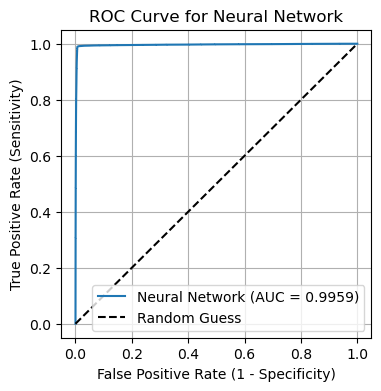

In [561]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC Curve and AUC
roc_auc = roc_auc_score(y_val, y_val_prob)
fpr, tpr, _ = roc_curve(y_val, y_val_prob)

# Plot the ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f"Neural Network (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve for Neural Network")
plt.legend(loc="lower right")
plt.grid()
plt.show()


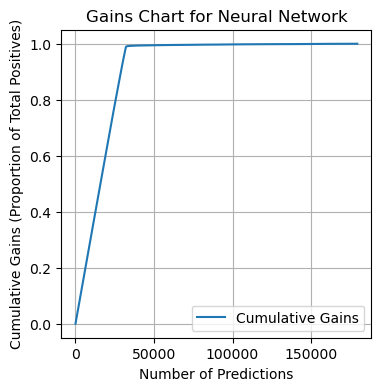

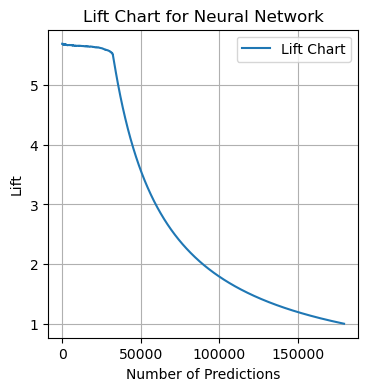

In [563]:
import numpy as np

# Sort by predicted probabilities
sorted_indices = np.argsort(-y_val_prob)
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)

# Calculate cumulative gains
cumulative_gains = np.cumsum(sorted_actuals) / sum(y_val)

# Gains Chart
plt.figure(figsize=(4, 4))
plt.plot(range(1, len(cumulative_gains) + 1), cumulative_gains, label="Cumulative Gains")
plt.xlabel("Number of Predictions")
plt.ylabel("Cumulative Gains (Proportion of Total Positives)")
plt.title("Gains Chart for Neural Network")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calculate Lift values
lift = cumulative_gains / (np.arange(1, len(cumulative_gains) + 1) / len(y_val))

# Lift Chart
plt.figure(figsize=(4, 4))
plt.plot(range(1, len(lift) + 1), lift, label="Lift Chart")
plt.xlabel("Number of Predictions")
plt.ylabel("Lift")
plt.title("Lift Chart for Neural Network")
plt.legend(loc="upper right")
plt.grid()
plt.show()


## Incorporate Cost and Net Profit

In [565]:
# **Step 8: Profit Analysis**
def calculate_net_profit(actual, predicted, disbursement_gross):
    profit = []
    for act, pred, gross in zip(actual, predicted, disbursement_gross):
        if pred == 0:  # Predicted PIF (grant loan)
            if act == 0:  # Actual PIF
                profit.append(0.05 * gross)  # 5% profit
            else:  # Actual CHGOFF
                profit.append(-5 * 0.05 * gross)  # Loss
        else:  # Predicted Default (deny loan)
            profit.append(0)  # No profit/loss
    return sum(profit)

# Calculate profit
total_profit = calculate_net_profit(y_val, y_val_pred, disbursement_tree)
print(f"\nTotal Net Profit for Threshold {best_threshold:.4f}: ${total_profit:.2f}")



Total Net Profit for Threshold 0.2726: $1582125988.60


## Model - 5: Discriminant analysis

In [567]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

# **Step 1: Preprocessing the Data**

# Select predictors
numeric_features = ['Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
categorical_features = ['UrbanRural', 'NewExist', 'LowDoc']

# Create dummy variables
data_dummies = pd.get_dummies(data[categorical_features], drop_first=True)

# Combine numerical and dummy variables
X = pd.concat([data[numeric_features], data_dummies], axis=1)

# Define target variable
y = data['MIS_Status_Binary']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize predictors
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])


In [569]:
# **Step 2: Hyperparameter Tuning for RDA**
param_grid = {
    'reg_param': np.linspace(0, 1, 11),  # Regularization parameter (0=LDA, 1=QDA)
}

# Perform Grid Search
grid_search_rda = GridSearchCV(
    estimator=QDA(),
    param_grid=param_grid,
    scoring='f1',  # Optimize F1-score
    cv=3,
    n_jobs=-1
)
grid_search_rda.fit(X_train, y_train)

# Best Parameters
best_rda = grid_search_rda.best_estimator_
print("Best Parameters for RDA:", grid_search_rda.best_params_)

Best Parameters for RDA: {'reg_param': 0.0}


In [571]:
# **Step 3: Predict Probabilities**
y_val_prob_rda = best_rda.predict_proba(X_val)[:, 1]

# **Step 4: Determine Optimal Threshold**
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob_rda)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]
best_f1_score = f1_scores[best_f1_index]

# Print the best threshold and F1-score
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-Score: {best_f1_score:.4f}")


Best Threshold: 0.2404
Best F1-Score: 0.9444


In [573]:
# **Step 5: Evaluate Metrics at Optimal Threshold**
y_val_pred_rda = (y_val_prob_rda >= best_threshold).astype(int)

conf_matrix = confusion_matrix(y_val, y_val_pred_rda)
tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
roc_auc = roc_auc_score(y_val, y_val_prob_rda)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rda))


Confusion Matrix:
[[146335   1587]
 [  1897  29615]]
Specificity: 0.9893
Sensitivity (Recall): 0.9398
Accuracy: 0.9806
ROC-AUC Score: 0.9821

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    147922
           1       0.95      0.94      0.94     31512

    accuracy                           0.98    179434
   macro avg       0.97      0.96      0.97    179434
weighted avg       0.98      0.98      0.98    179434



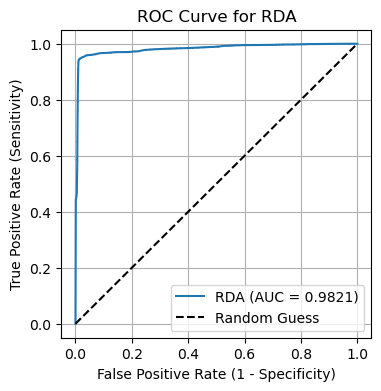

In [575]:
# **Step 7: ROC Curve**
fpr, tpr, _ = roc_curve(y_val, y_val_prob_rda)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f"RDA (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve for RDA")
plt.legend(loc="lower right")
plt.grid()
plt.show()


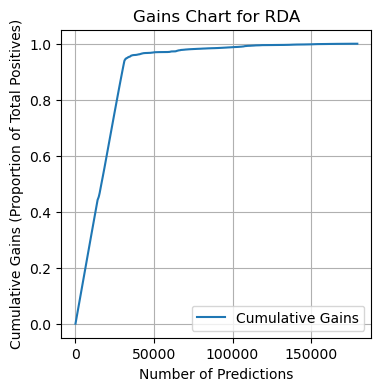

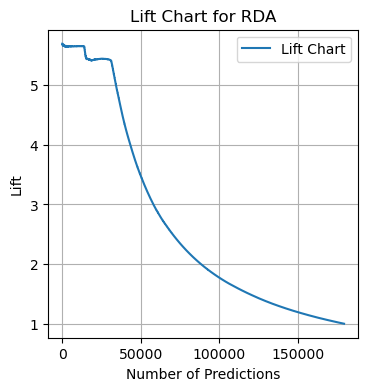

In [577]:
# **Step 8: Gains Chart**
sorted_indices = np.argsort(-y_val_prob_rda)  # Sort by predicted probabilities
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)

# Calculate cumulative gains
cumulative_gains = np.cumsum(sorted_actuals) / sum(sorted_actuals)

plt.figure(figsize=(4, 4))
plt.plot(range(1, len(cumulative_gains) + 1), cumulative_gains, label="Cumulative Gains")
plt.xlabel("Number of Predictions")
plt.ylabel("Cumulative Gains (Proportion of Total Positives)")
plt.title("Gains Chart for RDA")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **Step 9: Lift Chart**
lift = cumulative_gains / (np.arange(1, len(cumulative_gains) + 1) / len(sorted_actuals))

plt.figure(figsize=(4, 4))
plt.plot(range(1, len(lift) + 1), lift, label="Lift Chart")
plt.xlabel("Number of Predictions")
plt.ylabel("Lift")
plt.title("Lift Chart for RDA")
plt.legend(loc="upper right")
plt.grid()
plt.show()

## Incorporate Cost and Net Profit

In [579]:
def calculate_net_profit(y_true, y_pred, disbursement):
    profit_vector = []
    for actual, predicted, gross in zip(y_true, y_pred, disbursement):
        if predicted == 0:  # Predicted Paid in Full
            if actual == 0:  # Actual Paid in Full
                profit_vector.append(0.05 * gross)  # 5% profit
            else:  # Actual Default
                profit_vector.append(-5 * 0.05 * gross)  # Loss
        else:  # Predicted Default
            profit_vector.append(0)  # No profit/loss
    return sum(profit_vector)

# Calculate net profit at the best threshold
disbursement_rda = data.loc[X_val.index, "DisbursementGross"].values  # Ensure DisbursementGross aligns with validation data

total_net_profit = calculate_net_profit(y_val, y_val_pred_rda, disbursement_rda)

print(f"Total Net Profit for Best Threshold ({best_threshold:.4f}): ${total_net_profit:.2f}")


Total Net Profit for Best Threshold (0.2404): $1558540857.85


## Question-3: Profit Optimization by Random Forest Model

In [692]:
# **Step 2: Sorting Validation Data Based on Probabilities**
sorted_indices = np.argsort(y_val_prob_rf)  # Ascending order for low-risk loans first
sorted_actuals = y_val.iloc[sorted_indices].reset_index(drop=True)
sorted_disbursement = disbursement_tree[sorted_indices]
sorted_probabilities = y_val_prob_rf[sorted_indices]

# **Print Sorted Probabilities and Indices**
print("Sorted Probabilities and Indices (Low-Risk Loans First):")
for i, prob in zip(sorted_indices[:10], sorted_probabilities[:10]):
    print(f"Index: {i}, Probability: {prob:.4f}")


Sorted Probabilities and Indices (Low-Risk Loans First):
Index: 45220, Probability: 0.0000
Index: 123012, Probability: 0.0000
Index: 57149, Probability: 0.0000
Index: 57148, Probability: 0.0000
Index: 57147, Probability: 0.0000
Index: 123015, Probability: 0.0000
Index: 57145, Probability: 0.0000
Index: 57144, Probability: 0.0000
Index: 57142, Probability: 0.0000
Index: 57141, Probability: 0.0000


In [694]:
# **Step 2: Calculate Profit/Loss for Each Loan**
profit_vector = []
for actual, prob, gross in zip(sorted_actuals, sorted_probabilities, sorted_disbursement):
    if actual == 0:  # Actual Paid in Full
        profit_vector.append(0.05 * gross)  # 5% profit
    else:  # Actual CHGOFF (Default)
        profit_vector.append(-5 * 0.05 * gross)  # Loss

# **Step 3: Calculate Cumulative Profit**
cumulative_net_profit = np.cumsum(profit_vector)

# **Step 4: Determine Maximum Profit and Optimal Threshold**
max_profit = max(cumulative_net_profit)
max_profit_index = np.argmax(cumulative_net_profit)
optimal_threshold = sorted_probabilities[max_profit_index]

print(f"Maximum Net Profit: ${max_profit:.2f}")
print(f"Number of Loans Approved for Maximum Profit: {max_profit_index + 1}")
print(f"Optimal Probability Cut-Off for Future Loan Applicants: {optimal_threshold:.4f}")



Maximum Net Profit: $1589851091.60
Number of Loans Approved for Maximum Profit: 147072
Optimal Probability Cut-Off for Future Loan Applicants: 0.3804


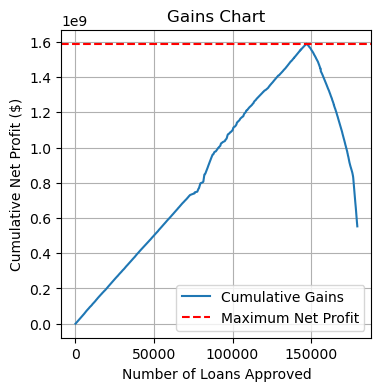

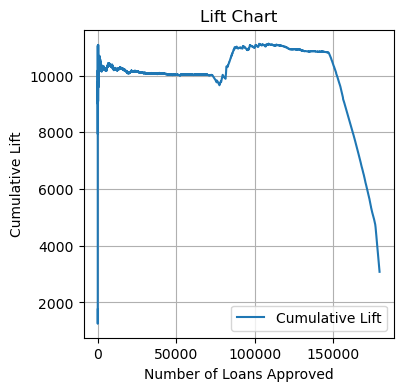

In [699]:
# **Step 5: Gains Chart**
plt.figure(figsize=(4, 4))
plt.plot(range(len(cumulative_net_profit)), cumulative_net_profit, label="Cumulative Gains")
plt.title("Gains Chart")
plt.xlabel("Number of Loans Approved")
plt.ylabel("Cumulative Net Profit ($)")
plt.axhline(y=max_profit, color="red", linestyle="--", label="Maximum Net Profit")
plt.legend()
plt.grid()
plt.show()

# **Step 6: Lift Chart**
cumulative_lift = cumulative_net_profit / np.arange(1, len(cumulative_net_profit) + 1)
plt.figure(figsize=(4, 4))
plt.plot(range(len(cumulative_lift)), cumulative_lift, label="Cumulative Lift")
plt.title("Lift Chart")
plt.xlabel("Number of Loans Approved")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.grid()
plt.show()


## Conclusion

**Model Used:** The analysis is based on the Random Forest Model, which provided robust predictions for classifying loan applications as low-risk or high-risk.

**Maximum Net Profit:** The maximum cumulative net profit achieved is $1,589,851,091.60, by approving 147,072 loans.

**Optimal Cut-Off Probability:** The optimal cut-off probability for granting future loans is 0.3804, as determined from the point of maximum net profit.

**Gains Charts:** shows cumulative profit increasing as loans are approved, peaking at the optimal number of loans.

**The Lift Chart** demonstrates the model's efficiency in prioritizing the least risky loans.

**Actionable Insights:**

Approve loans in order of predicted probabilities, starting with the least risky applicants.

Stop approving loans after the 147,072nd loan to maximize profitability.

Use a probability threshold of 0.3804 for future loan approvals based on the Random Forest Model.